In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

**Работу с этим массивом данных я начну со столбчатого графика, на мой взгляд самый читабельный и наглядный вид диаграмм.**

In [2]:
nba_player = pd.read_csv('/Users/klavdiakavesnikova/projects/Python_homework/HW14_Python_visualization/Seasons_Stats.csv')
nba_player = nba_player[['Player', 'Age']]
nba_player.shape

(24691, 2)

In [3]:
# удаляем все дубликаты и ячейки с пустыми значениями

nba_player = nba_player.dropna()
print(nba_player.shape)

(24616, 2)


In [4]:
nba_player.drop_duplicates(subset = ['Player', 'Age'], keep = 'first', inplace = True)
print(nba_player.shape)

# в итоге из первоначального файла мы убрали порядка 4,4 тыс строк

(20206, 2)


In [5]:
nba_player['Age'] = nba_player.Age.astype('int64')

In [6]:
grouped_nba_player = nba_player.groupby(['Age']).count().reset_index()

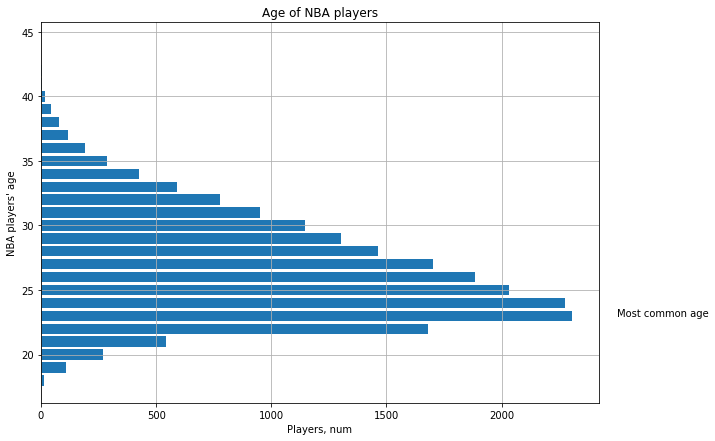

In [7]:
plt.barh(grouped_nba_player['Age'], grouped_nba_player['Player'])
plt.xlabel('Players, num')
plt.ylabel("NBA players' age")
plt.title('Age of NBA players')
plt.text(2500, 23, 'Most common age')
plt.grid()

**По этому графику видно, что основной возраст игроков NBA 23-24 года, но информация, которой мы располагаем не дает понять, что это за возраст. Может это возраст игрока на момент начала карьеры (вряд ли старт карьеры может быть в 44 года, но все же), единственное, это точно не возраст игрока на сегодняшний день. Поэтому воспользуемся файлом с другими данными и посчитаем возраст на момент старта и завершения спортивной карьеры.** 

In [8]:
NBA_pl = pd.read_csv('/Users/klavdiakavesnikova/projects/Python_homework/HW14_Python_visualization/datasets_1358_30676_player_data.csv')
NBA_pl.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [9]:
# как и при работе с предыдущими данными удаляем все дубликаты и ячейки с пустыми значениями

NBA_pl = NBA_pl[['name', 'year_start', 'year_end', 'position', 'birth_date']].dropna()

In [10]:
NBA_pl.drop_duplicates(subset = ['name', 'year_start'], keep = 'first', inplace = True)
NBA_pl.shape

(4516, 5)

In [11]:
NBA_pl['name'] = NBA_pl.name.astype('str')
NBA_pl['year_start'] = NBA_pl.year_start.astype('int64')
NBA_pl['year_end'] = NBA_pl.year_end.astype('int64')
NBA_pl['birth_date'] = NBA_pl.birth_date.astype('str')

In [12]:
# с помощью регулярных выражений вычленим год рождения игрока

import re

phrase = r'1\d{3}$'

def find_match(column):
    if re.findall(phrase, column):
        return re.findall(phrase, column)[0]
    return '0'

NBA_pl['year_of_birth'] = NBA_pl.birth_date.apply(find_match)
NBA_pl.head()

,name,year_start,year_end,position,birth_date,year_of_birth
0,Alaa Abdelnaby,1991,1995,F-C,"June 24, 1968",1968
1,Zaid Abdul-Aziz,1969,1978,C-F,"April 7, 1946",1946
2,Kareem Abdul-Jabbar,1970,1989,C,"April 16, 1947",1947
3,Mahmoud Abdul-Rauf,1991,2001,G,"March 9, 1969",1969
4,Tariq Abdul-Wahad,1998,2003,F,"November 3, 1974",1974


In [13]:
NBA_pl['year_of_birth'] = NBA_pl.year_of_birth.astype('int64')

In [14]:
NBA_pl.loc[(NBA_pl.year_start!=0) & (NBA_pl.year_of_birth!=0), 'age_of_start'] = NBA_pl.year_start - NBA_pl.year_of_birth
NBA_pl.loc[(NBA_pl.year_end!=0) & (NBA_pl.year_of_birth!=0), 'age_of_end'] = NBA_pl.year_end - NBA_pl.year_of_birth
NBA_pl.head()

,name,year_start,year_end,position,birth_date,year_of_birth,age_of_start,age_of_end
0,Alaa Abdelnaby,1991,1995,F-C,"June 24, 1968",1968,23,27
1,Zaid Abdul-Aziz,1969,1978,C-F,"April 7, 1946",1946,23,32
2,Kareem Abdul-Jabbar,1970,1989,C,"April 16, 1947",1947,23,42
3,Mahmoud Abdul-Rauf,1991,2001,G,"March 9, 1969",1969,22,32
4,Tariq Abdul-Wahad,1998,2003,F,"November 3, 1974",1974,24,29


In [15]:
# сделаем доп столбец с разбивкой возраста игроков на момент окончания карьеры на категории (по нему потом построим график)

NBA_pl.loc[NBA_pl.age_of_end < 30, 'age_category'] = 'before 30'
NBA_pl.loc[(NBA_pl.age_of_end < 35) & (NBA_pl.age_of_end >= 30), 'age_category'] = '30-35'
NBA_pl.loc[(NBA_pl.age_of_end < 40) & (NBA_pl.age_of_end >= 35), 'age_category'] = '35-40'
NBA_pl.loc[NBA_pl.age_of_end >= 40, 'age_category'] = 'after 40'
NBA_pl.head()

,name,year_start,year_end,position,birth_date,year_of_birth,age_of_start,age_of_end,age_category
0,Alaa Abdelnaby,1991,1995,F-C,"June 24, 1968",1968,23,27,before 30
1,Zaid Abdul-Aziz,1969,1978,C-F,"April 7, 1946",1946,23,32,30-35
2,Kareem Abdul-Jabbar,1970,1989,C,"April 16, 1947",1947,23,42,after 40
3,Mahmoud Abdul-Rauf,1991,2001,G,"March 9, 1969",1969,22,32,30-35
4,Tariq Abdul-Wahad,1998,2003,F,"November 3, 1974",1974,24,29,before 30


In [16]:
NBA_pl_grouped_by_start = NBA_pl[['age_of_start', 'name']].groupby('age_of_start').count()

Text(0, 0.5, 'players, num')

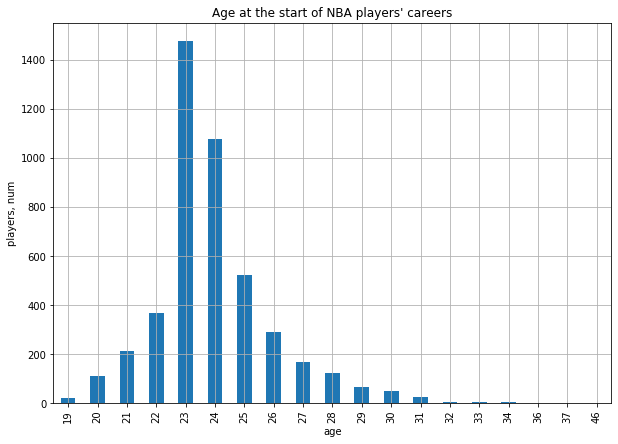

In [17]:
NBA_pl_grouped_by_start_bar = NBA_pl_grouped_by_start.plot(kind='bar', legend=False, grid=True)
NBA_pl_grouped_by_start_bar.set_title("Age at the start of NBA players' careers")
NBA_pl_grouped_by_start_bar.set_xlabel('age')
NBA_pl_grouped_by_start_bar.set_ylabel('players, num')

**По этому графику видно, что большинство игроков NBA начали карьеру в 23 года, что совпадает с выводом, сделанным из предыдущей таблицы, где кол-во игроков больше почти в 5 раз, но это не мешает вывести статистику.**

In [18]:
NBA_pl_grouped_by_end = NBA_pl[['age_category', 'age_of_end']].groupby('age_category').count()

Text(0, 0.5, 'players, num')

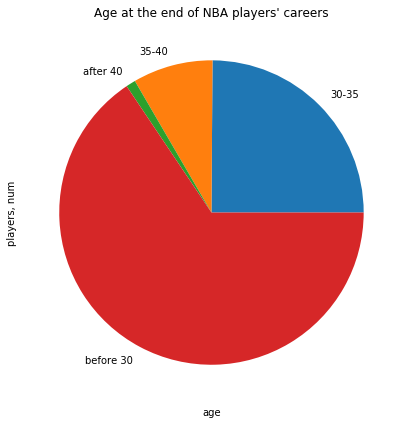

In [19]:
NBA_pl_grouped_by_end_bar = NBA_pl_grouped_by_end.plot(kind='pie', y='age_of_end', legend=False)
NBA_pl_grouped_by_end_bar.set_title("Age at the end of NBA players' careers")
NBA_pl_grouped_by_end_bar.set_xlabel('age')
NBA_pl_grouped_by_end_bar.set_ylabel('players, num')

**В этом конкретном случае круговая диаграмма как никогда показательна. Больше половины игроков NBA завершают свою карьеру до 30 лет. А возраст выхода на пенсию одинаков для всех игроков или все-таки зависит от позиции, на которой они играли? Давайте выясним. Для этого построим диаграмму размаха и heatmap.**

In [25]:
NBA_pl[['position', 'age_of_end', 'age_category']].head()

,position,age_of_end,age_category
0,F-C,27,before 30
1,C-F,32,30-35
2,C,42,after 40
3,G,32,30-35
4,F,29,before 30


In [24]:
# выясним, какие позиции вообще есть, все разбирать не будем, ниже небольшие пояснения
# C - center
# F - forward
# G - guard
# возможны комбинации 

NBA_pos = NBA_pl['position'].unique()
NBA_pos

array(['F-C', 'C-F', 'C', 'G', 'F', 'G-F', 'F-G'], dtype=object)

In [28]:
import seaborn as sns

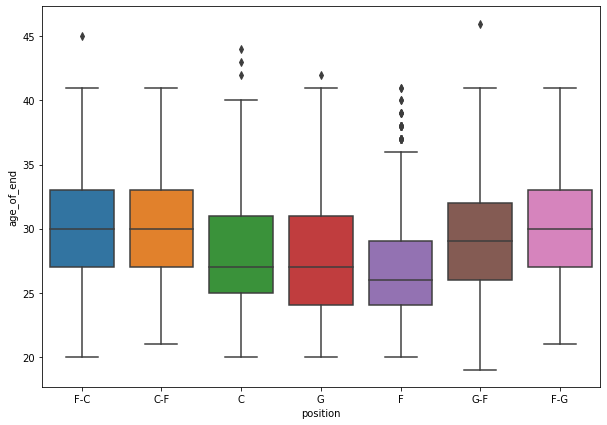

In [49]:
NBA_pos_boxplot = sns.boxplot(x="position", y="age_of_end", data=NBA_pl)

**Что ж, раньше всех на пенсию выходят именно forward, guard (медиана распределения ниже всех).**

In [55]:
NBA_position_table = NBA_pl.pivot_table(index='position', columns='age_category', values='age_of_end', aggfunc='count')
NBA_position_table

age_category,30-35,35-40,after 40,before 30
position,,,,
C,119,43,4,333
C-F,83,26,10,99
F,233,69,4,967
F-C,146,52,9,181
F-G,81,25,3,103
G,345,127,10,1085
G-F,117,42,6,194


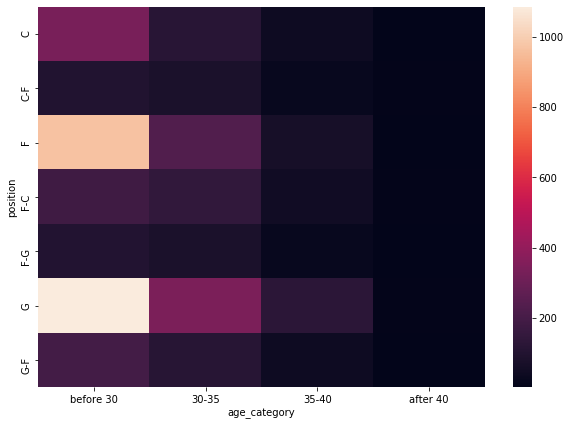

In [54]:
# явно указываю последовательность категорий

NBA_pos_heatmap = sns.heatmap(NBA_position_table[['before 30', '30-35', '35-40', 'after 40']])

**Подтвердили свое предположение - лидеры по раннему выходу на пенсию: Forward, Guard.**